In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import scipy.stats as st
import numpy as np
df = pd.read_csv('statistic_sample1.csv')
df['Japanese population  Female[thousands]'] = df['Japanese population  Female[thousands]'].str.replace(',', '').astype(int)
df.head(5)

,Japan Code,Japan,Year Code,Year,"/Internal migrants,Change,Rate and population",Internal migrants Both sexes,Internal migrants Male,Internal migrants Female,Sex ratio(Males per 100 females),Change from previous year Both sexes[%],Change from previous year Male[%],Change from previous year Female[%],Rate of migration Both sexes[%],Rate of migration Male[%],Rate of migration Female[%],Japanese population Both sexes[thousands],Japanese population Male[thousands],Japanese population Female[thousands]
0,0,Japan,1954000000,1954,NaN,"5,498,318",***,***,***,***,***,***,6.27,***,***,"87,652","43,020",44632
1,0,Japan,1955000000,1955,NaN,"5,140,569",***,***,***,-6.5,***,***,5.80,***,***,"88,678","43,533",45145
2,0,Japan,1956000000,1956,NaN,"4,859,625",***,***,***,-5.5,***,***,5.43,***,***,"89,573","43,974",45599
3,0,Japan,1957000000,1957,NaN,"5,268,248",***,***,***,8.4,***,***,5.83,***,***,"90,327","44,342",45985
4,0,Japan,1958000000,1958,NaN,"5,294,291","2,386,443","2,193,979",108.8,0.5,***,***,5.81,***,***,"91,162","44,749",46413


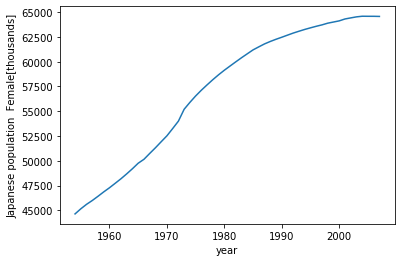

In [161]:

plt.plot(df['Year'], df['Japanese population  Female[thousands]'])
plt.xlabel('year')
plt.ylabel('Japanese population  Female[thousands]')
plt.show()

In [18]:
#母集団の平均、標準偏差、分散
population_mean = np.mean(df['Japanese population  Female[thousands]'])
population_std = np.std(df['Japanese population  Female[thousands]'])
population_var = np.var(df['Japanese population  Female[thousands]'])

In [163]:
#u = [norm.pdf(x = i, loc = mean1, scale=std1) for i in df['Japanese population  Female[thousands]']]
#df['norm'] = u

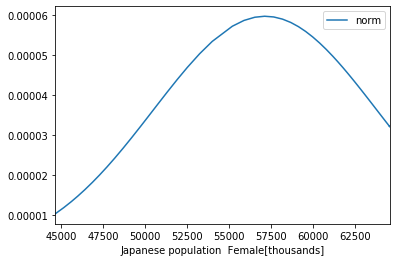

In [164]:
#df.plot(x = 'Japanese population  Female[thousands]', y = 'norm')

In [16]:
#sampleの平均、標準偏差、分散
sample = df['Japanese population  Female[thousands]'].sample(n = 20)
sample_mean=np.mean(random1)
sample_std = np.std(random1)
sample_list = list(random1)
print(sample_mean, sample_std)

55716.1 6509.574708842352


In [19]:
bottom, up = st.t.interval(0.95, len(sample)-1, sample_mean,sample_std)
bottom, up, population_mean
#母平均の区間推定(母分散は知らない)

(42091.40355042529, 69340.7964495747, 57150.18518518518)

In [25]:
#ddof=1は分散をn-1で割る
sample_var = np.var(sample, ddof=1)
df = len(random1) - 1
#χ²を手に入れただけ
chi2_025, chi2_975 = st.chi2.interval(alpha=0.95, df= df)
#df = n-1
#(n-1)*s²/χ²を0.025と0.975で計算しているだけ。
confidence_interval = (df*sample_var/chi2_025, df*sample_var/chi2_975)
confidence_interval, population_var
#母分散の推定

((116037315.94053267, 31458601.73922506), 44487142.336076796)

母集団の平均：57150.18518518518
sampleの平均の平均：57125.430949999994


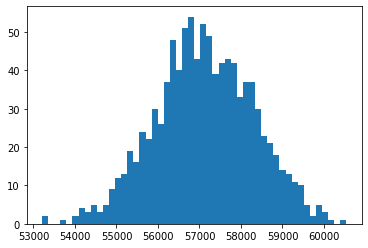

In [24]:
#sampleの平均の平均は母集団の平均に近づくという例
sample_mean_list = []
for i in range(1000):
    random1 = df['Japanese population  Female[thousands]'].sample(n = 20)
    mean2 = np.mean(random1)
    sample_mean_list.append(mean2)
plt.hist(sample_mean_list, bins = 50)
print('母集団の平均：'+str(population_mean))
print('sampleの平均の平均：'+str(np.array(sample_mean_list).mean()))

#検定とは。。。。
実際のmean(var.etc)を予想するmeanと同じかどうか、sampleのmeanを使って調べる(検定)することである。

In [141]:
variance1 = np.var(random1, ddof=1)
df = len(random1) - 1
chi2_025, chi2_975 = st.chi2.interval(alpha=0.95, df= df)
confidence_interval = (df*variance1/chi2_025, df*variance1/chi2_975)
confidence_interval, var1
#母分散の推定

((110653213.80621576, 29998930.56884406), 44487142.336076796)

In [196]:
t, p = st.ttest_1samp(sample_list, mean1)
t, p
#母平均のt検定

(1.317877947001993, 0.20321419860718498)

In [204]:
chi_value = st.chi2.ppf(0.975, df=19)
#test_var = df*int(variance1) / int(var)
#memory_error
#母分散のt検定